# DSCI 100 FINAL PROJECT #
#### By Shamel, Mochammad, Emma, Jiaxie

### Predicting Subscription Status with Age and Hours Played

Video games are an entertainment medium that millions consume daily, whether it may be your youngest sibling playing Roblox, a teenager playing Fortnite, or your grandfather playing a game of online solitaire. Increasingly, older age groups are beginning to understand the appeal of video games as a way to unwind, stimulate themselves mentally, and enjoy social interactions (De Schutter, 2011). On the otherside of the age range, excessive play time for young gamers has been getting linked with poor academic problems, attention problems, and difficulties in socializing (Kuss & Griffiths, 2012). Because of this, understanding who is playing, how they interact with the game, and what their reasons for interacting with it are becoming increasingly prevalent. Using the players.csv, a UBC data set containing a plethora of information on users regarding their playtime, ages, subscription status, etc; the goal of this project is to look for meaningful data and answer some exploratory questions regarding the minecraft research server and player data. Using this data set, the objective is address the following broad question: “What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?”.

The specific question we are trying to answer is:
#### Can we predict a player's likelihood to subscribe to the server based on age and hours played on a minecraft server using the UBC players.csv data set?

# 1. Data Description
**players.csv**
-
- **experience**: Players level (Amateur, Beginner, Regular, Pro, Veteran).
  - **Character**
- **subscribe**:Subscription Status (TRUE = Subscribed. FALSE = Not subscribed)
  - **Logical**
- **hashedEmail**: Email stored in form of hash
  - **Character**
- **played_hours**: Total hours played
  - **Double Precision**
- **name**: Player's in-game name
  - **Character**
- **gender**: Male, Female, Non-binary, Agender, Two-Spirit, Prefer not to say, or Other.
  - **Character**
- **Age**: Player's age
  - **Double Precision**
 
We think **played_hours** and **Age** act as meaningful and accurate predictors for **subscribe**, as more hours played indicates a higher level of commitment to the game, and age can determine the amount of time and money you have available to be able to commit to the server. This can help us understand who future players are, how they joined the server, and whether they would subscribe and why.

The following is our process to answer the stated question from making a more specific aspect we want to explore, loading and wrangling the data, making visualizations, and finally came to our conclusion. 

## Methods and Results

### Library Import
Here, we add the libraries that will help make our program:

In [1]:
library(tidyverse) #for easier data science
library(repr)
library(tidymodels) #for easier training and modeling
library(themis) #help in unbalanced dataset
options(repr.matrix.max.rows = 6) #adjust matrix maximum rows displayed

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

### Loading Dataset

Here, we load the dataset obtained using the url attained from the Github Repository:

In [2]:
players_url <- "https://raw.githubusercontent.com/ShamelessRake/DSCI-100-Project-005-039/refs/heads/main/players.csv"

players <- read_csv(players_url)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Wrangling Data

While the data seems pretty clean, we could still benefit from removing unwanted variables, lowercasing the A in "Age" for consistency with other variables, altering the subscribe data type from lgl to fct, and removing NA values. We will only need the subscribe, age, and played_hours variable for our modeling:

In [3]:
sub_time_age_df <- players |>
    select(subscribe, played_hours, Age) |>
    rename("age" = Age) |>
    mutate(subscribe = fct_recode(as.factor(subscribe), "subscribed" = "TRUE", "Not subscribed" = "FALSE")) |>
    drop_na()

head(sub_time_age_df)

subscribe,played_hours,age
<fct>,<dbl>,<dbl>
subscribed,30.3,9
subscribed,3.8,17
Not subscribed,0.0,17
subscribed,0.7,21
subscribed,0.1,21
subscribed,0.0,17


### Summarizing Data
It is important to know what data we're working with here, so some summarization regarding the maximum values, the minimum values, the mean, the standard deviations. Additionally, we should also find out how many people are subscribed and how many aren't. To do this, we use the wrangled data, select age and played hours, carry out a map argument to find the parameters for both age and hours played, and then rename them.

In [4]:
max_age_time <- sub_time_age_df |>
    select(played_hours, age) |>
    map_df(max, na.rm = TRUE) |>
    rename("most_hours_played" = played_hours, "oldest" = age)

min_age_time <- sub_time_age_df |>
    select(played_hours, age) |>
    map_df(min, na.rm = TRUE) |>
    rename("minimum_hours_played" = played_hours, "youngest" = age)

mean_age_time <- sub_time_age_df |>
    select(played_hours, age) |>
    map_df(mean, na.rm = TRUE) |>
    rename("average_hours_played" = played_hours, "average_age" = age)

sd_age_time <- sub_time_age_df |>
    select(played_hours, age) |>
    map_df(sd, na.rm = TRUE) |>
    rename("sd_hours_played" = played_hours, "sd_age" = age)

num_subscribed_and_unsubscribed <- sub_time_age_df |>
    select(subscribe) |>
    group_by(subscribe) |>
    summarize(count = n())

max_age_time
min_age_time
mean_age_time
sd_age_time
num_subscribed_and_unsubscribed

most_hours_played,oldest
<dbl>,<dbl>
223.1,50


minimum_hours_played,youngest
<dbl>,<dbl>
0,8


average_hours_played,average_age
<dbl>,<dbl>
5.904639,20.52062


sd_hours_played,sd_age
<dbl>,<dbl>
28.49793,6.174667


subscribe,count
<fct>,<int>
Not subscribed,52
subscribed,142


### Visualizing the Data
Let's take a look at the relationship of age (x-axis), hours played (y-axis), and subscription status (coloured). We will use `ggplot`, increase the size of our geom points and lower their transparency for better clarity. As well as labelling the axes, provide a title & subtitle, and increase the size of the text.

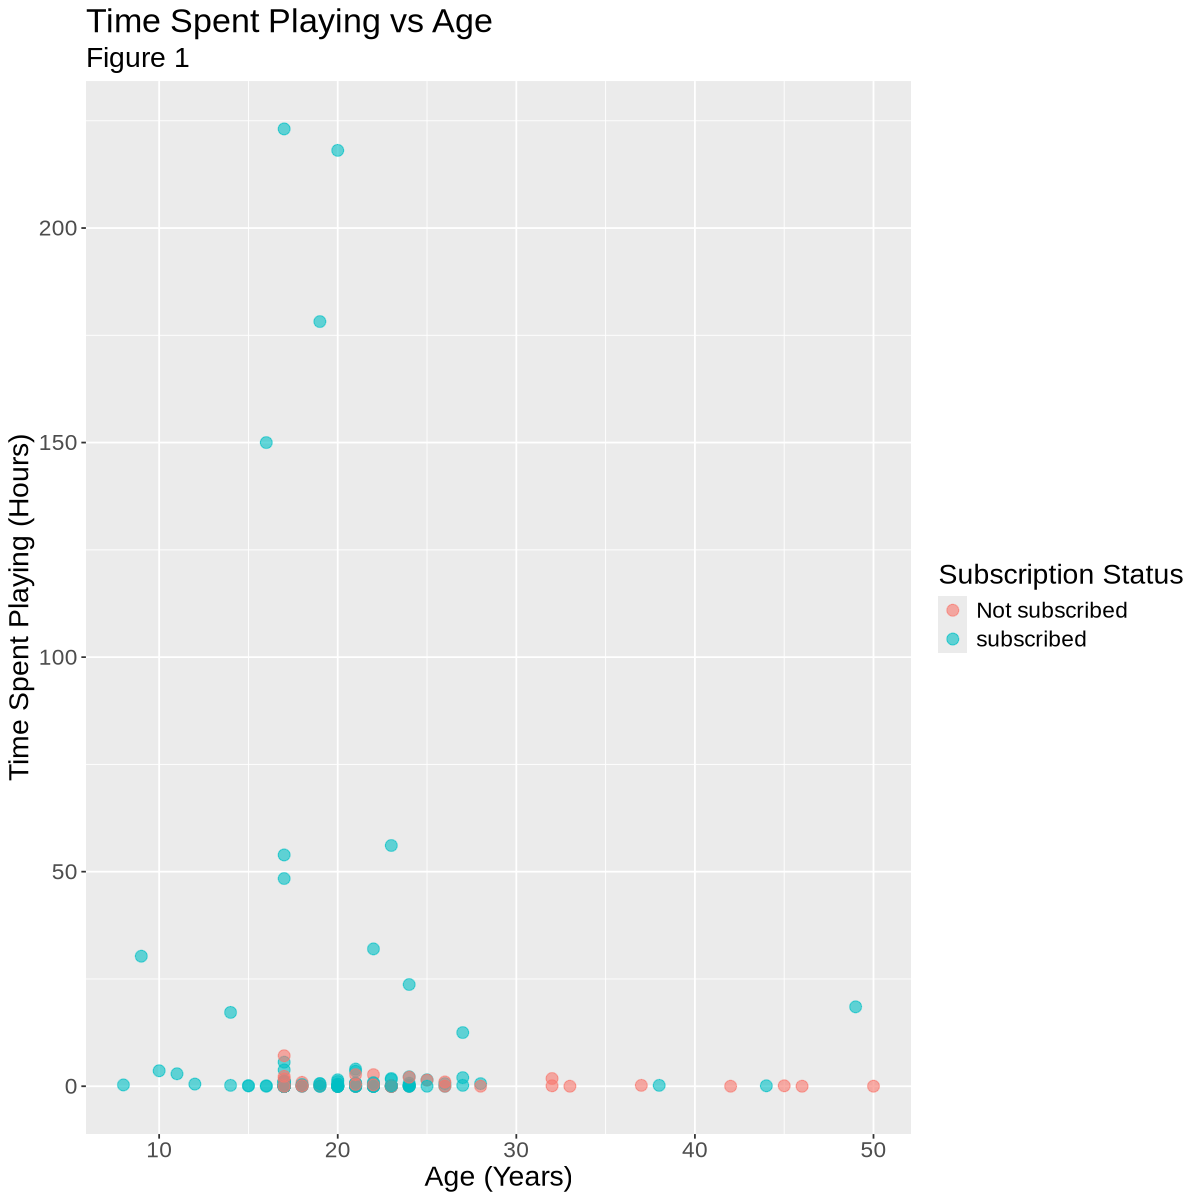

In [5]:
options(repr.plot.height = 10, repr.plot.width = 10)

plot_sub_time_age <-sub_time_age_df |>
    ggplot(aes(x = age, y = played_hours, color = subscribe)) +
    geom_point(size = 3, alpha = 0.6) +
    labs(x = "Age (Years)", y = "Time Spent Playing (Hours)", color = "Subscription Status", title = "Time Spent Playing vs Age", subtitle = "Figure 1") +
    theme(text = element_text(size = 17))
plot_sub_time_age

### Initial Observations
Nothing comes off very clearly as of now in indicating subscription status. There exist some spots where data seems to have points of subscription while other areas don't, such as those below the age of 17 being subscribed, and those above the age of 30 mostly not subscribed. There is still potential in finding patterns, but with eyes alone, we can't for sure spot a pattern.

### Creating the Training and Testing Split
Here, we split our data, allocating 75% of it to the training data, and the other 25% to the testing, a reasonable split that will give enough data to train the accuracy of our model, and test it.

In [6]:
set.seed(4321) #to prevent uneven data split

players_split <- initial_split(sub_time_age_df)
players_training <- training(players_split)
players_testing <- testing(players_split)

### Create and Train our K-Nearest Neighbor Classification Model

Now that we've done all the preliminary work, we can begin to work on actually training a K-Nearest Neighbor Classification Model that can potentially classify newly introduced data by learning from our previous data. To do this:

1. Make a specification that uses the "kknn" engine and sets the mode to "classification", as well finding the proper K value that's computationally inexpensive, and offers high accuracy.
2. Make a recipe that uses subscribe as the response variable, and remaining age and played_hours as our predictor variables.
3. Additionally, because of class imbalance we observed while summarizing data, we will add a `step_upsample()` to overratio the values for a more even distribution.
4. We'll make 5 folds of the data to cross validate it, with the strata being subscribe.
5. Finally, we workflow all of it.

Once workflowed, we collect the metrics, filter them specifically to accuracy, and then plot the neighbors and mean of accuracy to see what K values work the best. Additionally, we will arrange the data in descending order so we know numerically which K values are the best.

In [7]:
set.seed(4321)

k_grid <- tibble(neighbors = 1:100)
players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

players_recipe <- recipe(subscribe ~., data = players_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors()) |>
    step_upsample(subscribe, over_ratio = 1, skip = TRUE)

players_vfold <- vfold_cv(players_training, v = 5, strata = subscribe)

players_fit <- workflow() |>
    add_model(players_spec) |>
    add_recipe(players_recipe) |>
    tune_grid(resamples = players_vfold, grid = k_grid)

players_result <- players_fit |>
    collect_metrics() |>
    filter(.metric == "accuracy") |>
    select(neighbors, mean) |>
    arrange(desc(mean))

plot_accuracy <- ggplot(players_result, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "K", y = "Accuracy", title = "Accuracy vs K", subtitle = "Figure 2") +
    theme(text = element_text(size = 17))

neighbors,mean
<int>,<dbl>
1,0.5034483
2,0.4965517
3,0.5103448
4,0.5172414
5,0.4896552


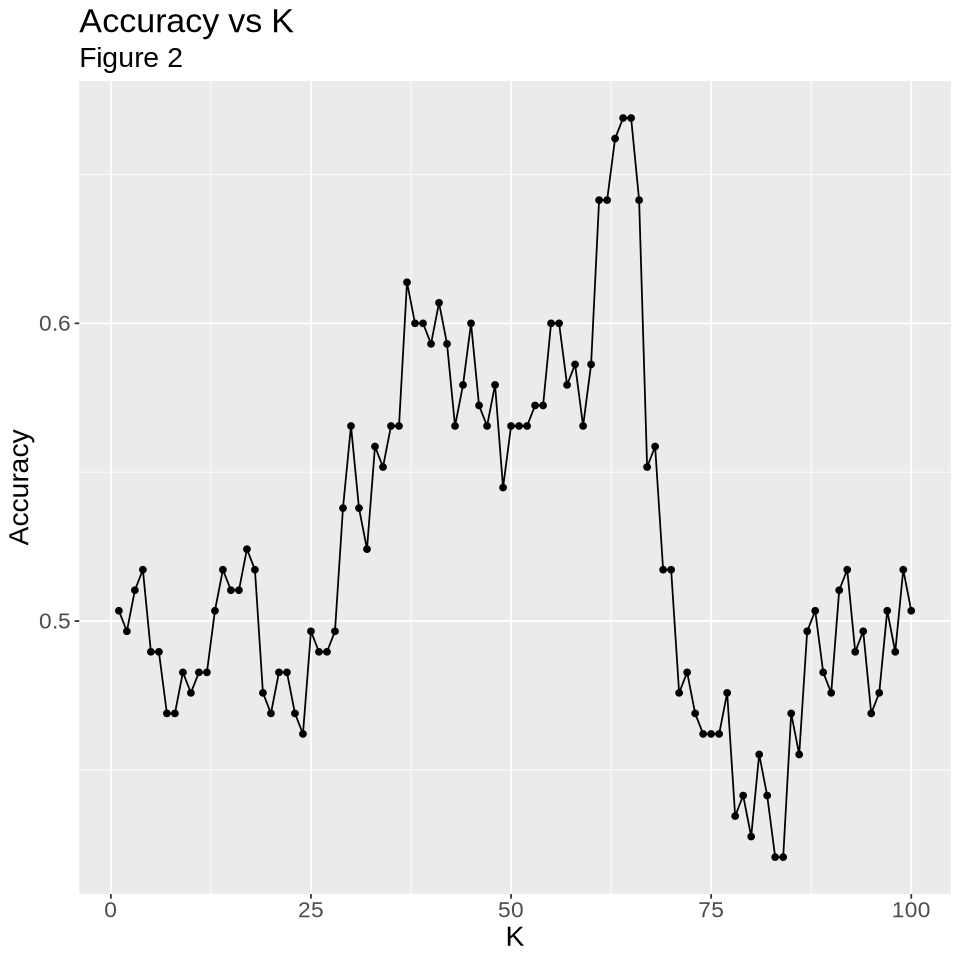

In [8]:
options(repr.plot.height = 8, repr.plot.width = 8)
players_result |> slice_min(neighbors, n= 5)
plot_accuracy

From what we can see, it appears that **4** offers a K value above 50%. From first glance, it may seem problematic as to why we're not choosing K = 64. It does have a value over 60% accuracy. Firstly,K = 4 is less computationally expensive compared to K = 64, making it easier for the model to predict the class. It also doesn't deviate off by that much near it's values.K = 64 loses roughly 10% for the neighbors below it and above it. The reasons that really matter come in regards to testing the classifier.

### Creating and Testing the Classifier
Now that we've decided the K = 4 is our classifier, we will make use that K-nearest neighbor value to test how accurate our classification model is. Then measure the recall, precision, as well as see how many false positives and negatives we got, along with true positives and negatives.

First we will call a new spec function using the neighbor value K = 4. We will workflow this again, this time not having to tune for cross validation but rather fitting it directly to `players_training`. Then we will run the predictions. Once ran, we will run the metrics function to determine how well our classifier did, and filter to see it's accuracy. Then, to know which values are which, we will check the levels in the data. Finallly, we will call the recall, precision, confusion matrix, and add them all to one table.

In [9]:
players_spec_known_k <- nearest_neighbor(weight_func = "rectangular", neighbor = 4) |>
    set_engine("kknn") |>
    set_mode("classification")

players_final_fit <- workflow() |>
    add_model(players_spec_known_k) |>
    add_recipe(players_recipe) |>
    fit(players_training)

prediction_players <- players_final_fit |>
    predict(players_testing) |>
    bind_cols(players_testing)

player_accuracy <- prediction_players |>
    metrics(truth = subscribe, estimate = .pred_class) |>
    filter(.metric == "accuracy")

event_levels_config <- prediction_players |> pull(subscribe) |> levels()

player_recall <- prediction_players |>
    recall(truth =subscribe, estimate = .pred_class, event_levels = "first")

player_precision <- prediction_players |>
    precision(truth =subscribe, estimate = .pred_class, event_levels = "first")

player_conf_mat <- prediction_players |>
     conf_mat(truth = subscribe, estimate = .pred_class)

player_metrics <- tibble(
    accuracy = player_accuracy |> select(.estimate) |> pull(),
    recall = player_recall |> select(.estimate) |> pull(),
    precision = player_precision |> select(.estimate) |> pull()
                        )

prediction_players
event_levels_config
player_conf_mat
player_metrics

.pred_class,subscribe,played_hours,age
<fct>,<fct>,<dbl>,<dbl>
Not subscribed,Not subscribed,0.0,17
subscribed,subscribed,0.0,19
Not subscribed,subscribed,0.1,17
⋮,⋮,⋮,⋮
Not subscribed,subscribed,0.0,17
subscribed,Not subscribed,0.3,22
Not subscribed,Not subscribed,0.0,17


[1] "Not subscribed" "subscribed"

                Truth
Prediction       Not subscribed subscribed
  Not subscribed             14         19
  subscribed                  3         13

accuracy,recall,precision
<dbl>,<dbl>,<dbl>
0.5510204,0.8235294,0.4242424


### Discussion On Accuracy, Precision, Recall, and Confusion Matrix

In this project we aimed to predict the subscription status of players on a minecraft server based on age and hours played. To do this, we built and evaluated a k-nearest neighbour model and got the following key results: 

* **Accuracy:** the model had an accuracy of 0.55, indicating that slightly over half of the predictions were correct. This accuracy is a good starting point, but shows that there are adjustments to be made to better improve the model to more accurately predict subscription status.                                                                                                               
* **Recall:** the model had a recall value of 0.82 for the subscribed group, indicating that the model was successful in identifying the majority of the actual subscribers. This value also indicates that the model tends to over-predict subscriptions versus non-subscriptions.                                                                                                                     
* **Precision:** The model had a precision value of 0.42 for the subscribed group, meaning that when the model predicted a player would subscribe it was only correct 42% of the time. This indicates that the model often incorrectly predicted non-subscribers as subscribers.                                                                                                                       
* **Confusion Matrix:** based on the confusion matrix, the model has a tendency to predict false positives, again suggesting that the model prioritizes identifying all subscribers even though that results in a large amount of false positives.                                               

The data presented for this project had a large class imbalance due to the large number of subscribers versus non-subscribers. This class imbalance explains the low accuracy value of 0.55  and is what we expected at the beginning of this project. The low precision value of 0.42 wasn’t as expected as the accuracy value,  but again can be explained by the large class imbalance causing the model to over-predict subscribers leading to a higher number of false positives. The recall value of 0.82 wasn’t surprising, as we expected the recall value to be very high. Although we did expect the recall value to be higher than 0.82 as age and hours played seemed like strong indicators to determine subscription status of the players on the minecraft server. 


Additionally, when we try to increase K neighbors number that are optimal based on the accuracy versus K value, we find that the accuracy did increase but only in marginal amount while recall and precision plummet. this is likely due to the class imbalance mentioned before, making the model much more inclined to predict "subscribed" just because the majority of the data is subscribed. Additionally, while K = 64 appeared to have a high accuracy value of 66%, it plummets down to 57% when we fit the training data, while the recall was very low. In comparison, K = 4 originally had a predicted accuracy of 51%, but during the actual prediction, it increased to 55%, and presented a recall value of 82%. These results are relatively what we expected to have as the class imbalance of roughly 3:1 of subscribed:not-subscribed may it very easy to have skewed data, and therefore, we determined that we had a decent balance with accuracy, precision and recall.

These findings will result in:

The model will be more inclined to predict new observations into **subscribed**, because of the imbalance between subscribed versus non-subscribed data that are further worsened by the small amount of data available. Therefore, from the current data and model that we have, **we can do a decent job in determining a player's likelihood to subscribe to the server based on age and hours played on a minecraft server in the players.csv data set despite the heavily skewed number of subscribed to those unsubscribed.**

When it comes to analyzing data, sacrifices often have to be made to ensure the data can a tell a story within the parameters it’s specified to. In our case, we were working on a minecraft server in determining predictors of subscription status through age and hours played. Because we’re not working with special information that can negatively impact individuals, we’re not in need of ensuring we build an algorithm that achieves correct predictions 99% of the time. However, we also don’t want to be predict variables as accurately as a coin toss. While an accuracy of 55% may not seem so significant, it is important to consider the other values that make up this value. The model showed a recall of 82% for the subscribed group, demonstrating it's ability to correctly identify all actual positive instances within the players dataset.
To us, this is beneficial in understanding these players, as we expect people to subscribe to this newsletter when they join the server. In doing so, this allows us to build a table that can find out when people really aren't subscribing to the newsletter, and from there, we can begin to ask further quesions as to why they wouldn't. K = 4 provides us the best balance of a decently high accuracy, and an excellent recall value. Higher K neighbors would only encourage showing new data as subscribed because there is a 3:1 ratio for subscribed to not-subscribed, so while we did sacrifice a potentially higher accuracy, we traded it for a improvement in balance between accuracy, recall, and precision.

Future questions that can be generated from our findings are:
* Will increasing the number of data while keeping the proportion of subscribers versus non-subscribers lead to different result?
* What would happen to the prediction model if the variable proportions is changed (e.g. increasing non-subscribers count, diversifying the age of players, increasing the play time of every players) while keeping the number of data constant?

We will pass our result and questions generated from our findings to the readers and other data scientists up for your own interpretations and use our repositories and method as a reference to better improve the prediction models.

### References

De Schutter, B. (2011). Never Too Old to Play: The Appeal of Digital Games to an Older Audience. Games and Culture, 6(2), 155–170. https://doi.org/10.1177/1555412010364978

Kuss, D. J., & Griffiths, M. D. (2012). Internet Gaming Addiction: A Systematic Review of Empirical Research. International Journal of Mental Health and Addiction, 10(2), 278–296. https://doi.org/10.1007/s11469-011-9318-5
